# **Cloning the git repo to use the source codes**

In [1]:
!git clone https://github.com/IJustKen/depression_project.git

Cloning into 'depression_project'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 165 (delta 53), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (165/165), 1.48 MiB | 7.55 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [2]:
!git pull

fatal: not a git repository (or any of the parent directories): .git


In [3]:
import sys
sys.path.append('/content/depression_project/funcs')
sys.path.append('/content/depression_project/data')

In [4]:
%cd depression_project

/content/depression_project


# **Importing Necessary Functions**

In [5]:
# Imports from data_preprocessing.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from funcs.data_preprocessing import (
    num_cat_column_analysis,
    rm_rows_with_val,
    rm_rows_with_rare_cats,
    one_hot_encode_dataframe,
    Z_Scaler,
    MinMax_Scaler,
)

# Imports from eda_plotting.py
from funcs.eda_plotting import (
    analyze_feature_distributions,
    plot_feature_target_correlations,
    plot_grouped_boxplots,
)

# Imports from feature_selection.py
from funcs.feature_selection import (
    feat_eng,
    select_features_with_rf,
    select_features_with_lasso,
    apply_pca,
)

# Imports from classification.py
from funcs.classification import (
    classify_svc,
    classify_rf,
    classify_logistic,
)

# Imports from model_evaluation.py
from funcs.model_evaluation import (
    compare_clf,
)

# Imports from hyperparameter_tuning.py
from funcs.hyperparameter_tuning import (
    best_svc_params_gridsearch,
    best_svc_params_randomizedsearch,
)

# Imports from regression.py
from funcs.regression import (
    get_training_scores,
    regress_linear,
    regress_bagging,
    regress_rf,
    compare_regs,
)

# **Data Preprocessing**

In [6]:
import pandas as pd
# %cd ..
data = pd.read_csv("data/student_depression_dataset.csv")

In [7]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [8]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [10]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [11]:
num_cols,cat_cols=num_cat_column_analysis(data)

Column Analysis for: id
    - Total Unique Values (n): 27901
    - Type: Numerical/High Cardinality
    - Min: 2
    - Max: 140699
    - Mean: 70442.15
Column Analysis for: Gender
    - Total Unique Values (n): 2
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
Gender
Male      15547
Female    12354
Name: count, dtype: int64
Column Analysis for: Age
    - Total Unique Values (n): 34
    - Type: Numerical/High Cardinality
    - Min: 18.0
    - Max: 59.0
    - Mean: 25.82
Column Analysis for: City
    - Total Unique Values (n): 52
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            

In [12]:
print(f"**Numerical Columns** ({len(num_cols)}):")
print(num_cols)
print()
print(f"**Categorical Columns** ({len(cat_cols)}):")
print(cat_cols)

**Numerical Columns** (9):
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']

**Categorical Columns** (9):
['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


In [13]:
X=data.drop('Depression',axis=1)
data_new=X.drop('id',axis=1).copy()

In [14]:
Y=data['Depression']

In [15]:
column_name = 'Dietary Habits'
value_to_drop = 'Others'
data_new=rm_rows_with_val(data_new,column_name,value_to_drop)

Dataset Size Before Drop: 27901 rows
Rows Dropped (Dietary Habits is 'Others'): 12
Dataset Size After Drop: 27889 rows


In [16]:
column_name = 'Sleep Duration'
value_to_drop = 'Others'
data_new=rm_rows_with_val(data_new,column_name,value_to_drop)

Dataset Size Before Drop: 27889 rows
Rows Dropped (Sleep Duration is 'Others'): 18
Dataset Size After Drop: 27871 rows


In [17]:
data_new=rm_rows_with_rare_cats(data_new,10)
#note that financial stress is still a categorical column instead of numerical
#we have now removed the '?'.

Starting with 27871 rows.
----------------------------------------
| Gender              : 0 rare categories found.
| City                : 22 rare categories found.
| Profession          : 13 rare categories found.
| Sleep Duration      : 0 rare categories found.
| Dietary Habits      : 0 rare categories found.
| Degree              : 0 rare categories found.
| Have you ever had suicidal thoughts ?: 0 rare categories found.
| Financial Stress    : 1 rare categories found.
| Family History of Mental Illness: 0 rare categories found.
----------------------------------------
Processing Complete.
Total Rows Removed: 60
Final Rows Remaining: 27811


In [18]:
num_cols1,cat_cols1=num_cat_column_analysis(data_new)

Column Analysis for: Gender
    - Total Unique Values (n): 2
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
Gender
Male      15497
Female    12314
Name: count, dtype: int64
Column Analysis for: Age
    - Total Unique Values (n): 34
    - Type: Numerical/High Cardinality
    - Min: 18.0
    - Max: 59.0
    - Mean: 25.82
Column Analysis for: City
    - Total Unique Values (n): 30
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
City
Kalyan           1563
Srinagar         1370
Hyderabad        1337
Vasai-Virar      1287
Lucknow          1154
Thane            1139
Ludhiana         1107
Agra             1090
Surat            1078
Kolkata          1064
Jaipur           1033
Patna            1006
Pune              968
Visakhapatnam     967
Ahmedabad         946
Bhopal            933
Chennai           884
Meerut            820
Rajkot            815
Bangalore         765
Delhi             765
Ghaziabad         743
Mumbai            697
Vadodara          6

In [19]:
data_num=data_new[num_cols1]
data_cat=data_new[cat_cols1]

In [20]:
#Financial stress needs to go to numerical columns after removal of  '?'.
data_num['Financial Stress']=data_cat['Financial Stress']
data_cat=data_cat.drop('Financial Stress',axis=1)
data_num['Financial Stress'] = pd.to_numeric(data_num['Financial Stress'], errors='raise')

# #target is a numerical column
# data_num=data_num.drop(['id','Depression'],axis=1)

# # removal of '?'
#column_name = 'Financial Stress'
# print(f"Initial unique values: {data_num[column_name].unique()}")
# data_num[column_name] = data_num[column_name].replace('?', np.nan)
# data_num['Financial Stress'] = pd.to_numeric(data_num['Financial Stress'], errors='raise')
# print(f"New data type for '{column_name}': {data_num[column_name].dtype}")
# print(f"Number of missing values (NaN) now: {data_num[column_name].isna().sum()}")

# #imputation with median
# median_value = data_num[column_name].median()
# data_num[column_name]=data_num[column_name].fillna(median_value)
# print(f"Imputed NaN with median: {median_value}")
# print(f"Missing values after imputation: {data_num[column_name].isna().sum()}")

/tmp/ipython-input-1345118520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Financial Stress']=data_cat['Financial Stress']
/tmp/ipython-input-1345118520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Financial Stress'] = pd.to_numeric(data_num['Financial Stress'], errors='raise')


In [21]:
data_num.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000
mean,25.819496,3.141059,0.000431,7.655950,2.943871,0.000683,7.159254,3.140088
std,4.907076,1.381904,0.044063,1.471008,1.360952,0.044466,3.706694,1.437018
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,2.000000,0.000000,6.280000,2.000000,0.000000,4.000000,2.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000


In [22]:
data_num.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')

In [23]:
data_cat.columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [24]:
#label encoding using .map() for two columns sleep duration and dietary habits as they have ordinal categories.
sleep_mapping = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'":4,

    # Add other categories if they exist (e.g., 'More than 8 hours': 4)
}
diet_mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}

data_cat['Sleep Duration_Encoded'] = data_cat['Sleep Duration'].map(sleep_mapping)
data_cat['Dietary Habits_Encoded'] = data_cat['Dietary Habits'].map(diet_mapping)

In [25]:
data_cat

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Sleep Duration_Encoded,Dietary Habits_Encoded
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,No,2,3
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,Yes,2,2
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,Yes,1,3
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,Yes,3,2
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,No,2,2
...,...,...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes,Yes,2,1
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,No,Yes,1,3
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No,No,2,1
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',Yes,No,1,3


In [26]:
data_cat['Dietary Habits_Encoded'].value_counts()

,count
Dietary Habits_Encoded,
1,10287
2,9897
3,7627


In [27]:
data_cat['Sleep Duration_Encoded'].value_counts()

,count
Sleep Duration_Encoded,
1,8290
3,7324
2,6166
4,6031


In [28]:
df_new_feat = feat_eng(data_num)

/content/depression_project/funcs/feature_selection.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Satisfaction'] = (df['Study Satisfaction'] + df['Job Satisfaction']) / 2
/content/depression_project/funcs/feature_selection.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resilience'] = df['CGPA'] * (df['Academic Pressure'] + df['Work Pressure']) * df['Work/Study Hours']
/content/depression_project/funcs/feature_selection.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [29]:
data_ohe=data_cat.drop(['Sleep Duration','Dietary Habits','Sleep Duration_Encoded','Dietary Habits_Encoded'],axis=1)
df_new_feat[['Sleep Duration','Dietary Habits']]=data_cat[['Sleep Duration_Encoded','Dietary Habits_Encoded']]
data_num_scaled_Z=Z_Scaler(df_new_feat)
data_num_scaled_MM=MinMax_Scaler(df_new_feat)

/tmp/ipython-input-3472732372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_feat[['Sleep Duration','Dietary Habits']]=data_cat[['Sleep Duration_Encoded','Dietary Habits_Encoded']]
/tmp/ipython-input-3472732372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_feat[['Sleep Duration','Dietary Habits']]=data_cat[['Sleep Duration_Encoded','Dietary Habits_Encoded']]


In [30]:
data_num_scaled_MM

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits
0,0.365854,1.0,0.0,0.897,0.4,0.0,0.250000,0.00,0.285714,0.224250,0.009901,0.333333,1.0
1,0.146341,0.4,0.0,0.590,1.0,0.0,0.250000,0.25,0.714286,0.059000,0.001594,0.333333,0.5
2,0.317073,0.6,0.0,0.703,1.0,0.0,0.750000,0.00,0.714286,0.316350,0.002390,0.000000,1.0
3,0.243902,0.6,0.0,0.559,0.4,0.0,0.333333,1.00,0.285714,0.111800,0.005941,0.666667,0.5
4,0.170732,0.8,0.0,0.813,0.6,0.0,0.083333,0.00,0.428571,0.054200,0.005298,0.333333,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.219512,1.0,0.0,0.575,1.0,0.0,0.583333,0.00,0.714286,0.335417,0.003984,0.333333,0.0
27897,0.219512,0.4,0.0,0.940,0.6,0.0,0.000000,0.50,0.428571,0.000000,0.002649,0.000000,1.0
27898,0.317073,0.6,0.0,0.661,0.8,0.0,1.000000,0.25,0.571429,0.396600,0.002985,0.333333,0.0
27899,0.000000,1.0,0.0,0.688,0.4,0.0,0.833333,1.00,0.285714,0.573333,0.009901,0.000000,1.0


In [31]:
data_num_scaled_Z

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits
0,1.463322,1.345226,-0.009793,0.893315,-0.693550,-0.015364,-1.122113,-1.489283,-0.694179,-0.310171,0.364560,-0.354082,1.374954
1,-0.370797,-0.825730,-0.009793,-1.193727,1.510830,-0.015364,-1.122113,-0.793385,1.510604,-1.059013,-0.401308,-0.354082,0.120028
2,1.055740,-0.102078,-0.009793,-0.425532,1.510830,-0.015364,0.496610,-1.489283,1.510604,0.107186,-0.327849,-1.241552,1.374954
3,0.444367,-0.102078,-0.009793,-1.404470,-0.693550,-0.015364,-0.852326,1.294309,-0.694179,-0.819746,-0.000555,0.533388,0.120028
4,-0.167006,0.621574,-0.009793,0.322268,0.041243,-0.015364,-1.661687,-1.489283,0.040749,-1.080764,-0.059795,-0.354082,0.120028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.240576,1.345226,-0.009793,-1.295700,1.510830,-0.015364,-0.042965,-1.489283,1.510604,0.193588,-0.180930,-0.354082,-1.134898
27897,0.240576,-0.825730,-0.009793,1.185637,0.041243,-0.015364,-1.931474,-0.097487,0.040749,-1.326375,-0.304011,-1.241552,1.374954
27898,1.055740,-0.102078,-0.009793,-0.711056,0.776036,-0.015364,1.305971,-0.793385,0.775676,0.470844,-0.273028,-0.354082,-1.134898
27899,-1.593543,1.345226,-0.009793,-0.527505,-0.693550,-0.015364,0.766397,1.294309,-0.694179,1.271723,0.364560,-1.241552,1.374954


In [32]:
data_ohe.describe()

,Gender,City,Profession,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27811,27811,27811,27811,27811,27811
unique,2,30,1,28,2,2
top,Male,Kalyan,Student,'Class 12',Yes,No
freq,15497,1563,27811,6074,17594,14348


In [33]:
data_ohe=one_hot_encode_dataframe(data_ohe)

In [34]:
data_ohe.columns

Index(['Gender_Male', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat',
       'City_Thane', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Degree_B.Arch', 'Degree_B.Com', 'Degree_B.Ed',
       'Degree_B.Pharm', 'Degree_B.Tech', 'Degree_BA', 'Degree_BBA',
       'Degree_BCA', 'Degree_BE', 'Degree_BHM', 'Degree_BSc', 'Degree_LLB',
       'Degree_LLM', 'Degree_M.Com', 'Degree_M.Ed', 'Degree_M.Pharm',
       'Degree_M.Tech', 'Degree_MA', 'Degree_MBA', 'Degree_MBBS', 'Degree_MCA',
       'Degree_MD', 'Degree_ME', 'Degree_MHM', 'Degree_MSc', 'Degree_Others',
       'Degree_PhD', 'Have you ever had s

In [35]:
data_final=pd.concat([data_num_scaled_Z,data_ohe],axis=1)

In [36]:
data_final #final preprocessed data with scaled numerical columns adn label encoded columns and One hot encoded column(bulk of th e columns)
#69 columns ==> 59 One hot encoded : 2 z_scaled label encoded : 8 z_scaled numerical columns

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,1.463322,1.345226,-0.009793,0.893315,-0.693550,-0.015364,-1.122113,-1.489283,-0.694179,-0.310171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.370797,-0.825730,-0.009793,-1.193727,1.510830,-0.015364,-1.122113,-0.793385,1.510604,-1.059013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.055740,-0.102078,-0.009793,-0.425532,1.510830,-0.015364,0.496610,-1.489283,1.510604,0.107186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.444367,-0.102078,-0.009793,-1.404470,-0.693550,-0.015364,-0.852326,1.294309,-0.694179,-0.819746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.167006,0.621574,-0.009793,0.322268,0.041243,-0.015364,-1.661687,-1.489283,0.040749,-1.080764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.240576,1.345226,-0.009793,-1.295700,1.510830,-0.015364,-0.042965,-1.489283,1.510604,0.193588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
27897,0.240576,-0.825730,-0.009793,1.185637,0.041243,-0.015364,-1.931474,-0.097487,0.040749,-1.326375,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27898,1.055740,-0.102078,-0.009793,-0.711056,0.776036,-0.015364,1.305971,-0.793385,0.775676,0.470844,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27899,-1.593543,1.345226,-0.009793,-0.527505,-0.693550,-0.015364,0.766397,1.294309,-0.694179,1.271723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Training the classification model**

In [37]:
from sklearn.model_selection import train_test_split
Y = Y.reindex(data_final.index)
X_train, X_test, Y_train, Y_test = train_test_split(data_final, Y, test_size=0.2, random_state=42, stratify=Y)

In [38]:
selected_features_list = select_features_with_rf(X_train, Y_train)

#Selected features only
X_train_final = X_train[selected_features_list]
X_test_final = X_test[selected_features_list] # Make sure to apply to X_test as well


--- Feature Importances from Random Forest ---
                                      Feature  Importance
70  Have you ever had suicidal thoughts ?_Yes    0.180163
9                                  Resilience    0.098726
1                           Academic Pressure    0.093991
10                Pressure_Satisfaction_Ratio    0.087960
7                            Financial Stress    0.076439
..                                        ...         ...
65                                  Degree_ME    0.001512
66                                 Degree_MHM    0.001273
68                              Degree_Others    0.000423
5                            Job Satisfaction    0.000032
2                               Work Pressure    0.000018

[72 rows x 2 columns]
\nSelected 14 features out of 72 using a threshold of 0.01.
Selected Features: ['Have you ever had suicidal thoughts ?_Yes', 'Resilience', 'Academic Pressure', 'Pressure_Satisfaction_Ratio', 'Financial Stress', 'Age', 'CGPA', 'Work/St

classification accuracy: 0.8522380010785547
classification report               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2308
           1       0.86      0.89      0.88      3255

    accuracy                           0.85      5563
   macro avg       0.85      0.84      0.85      5563
weighted avg       0.85      0.85      0.85      5563



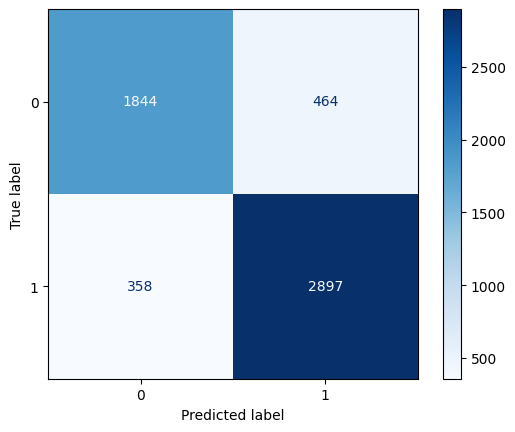

In [39]:
classify_logistic(X_train_final, Y_train, X_test_final, Y_test)

classification accuracy: 0.8499011324824735
classification report               precision    recall  f1-score   support

           0       0.84      0.79      0.81      2308
           1       0.86      0.89      0.87      3255

    accuracy                           0.85      5563
   macro avg       0.85      0.84      0.84      5563
weighted avg       0.85      0.85      0.85      5563



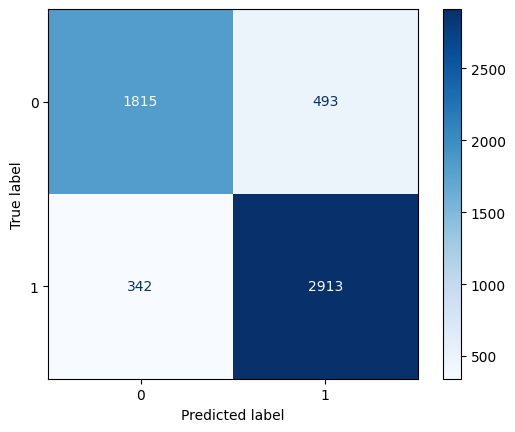

In [40]:
classify_svc(X_train_final, Y_train, X_test_final, Y_test)

classification accuracy: 0.8410929354664749
classification report               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2308
           1       0.86      0.88      0.87      3255

    accuracy                           0.84      5563
   macro avg       0.84      0.83      0.84      5563
weighted avg       0.84      0.84      0.84      5563



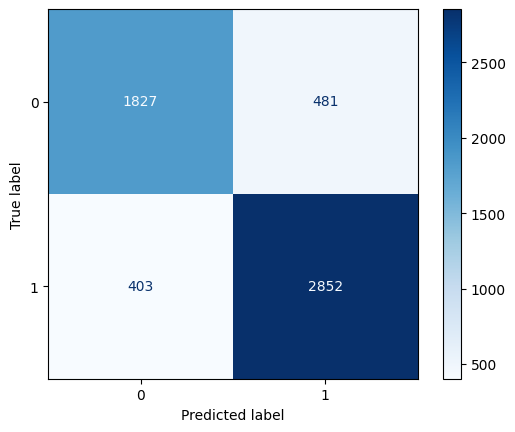

In [41]:
classify_rf(X_train_final, Y_train, X_test_final, Y_test)

# **Applying PCA**

In [42]:
# Now, apply PCA to retain 95% of the variance
X_train_pca, X_test_pca, pca = apply_pca(X_train_final, X_test_final, n_components=0.95)

# Or, apply PCA to get exactly 10 components
# X_train_pca, X_test_pca, pca = apply_pca(X_train_final, X_test_final, n_components=10)

Original number of features: 14
Number of components selected: 10
Total variance explained by selected components: 0.9572


classification accuracy: 0.8055006291569297
classification report               precision    recall  f1-score   support

           0       0.74      0.81      0.78      2308
           1       0.86      0.80      0.83      3255

    accuracy                           0.81      5563
   macro avg       0.80      0.81      0.80      5563
weighted avg       0.81      0.81      0.81      5563



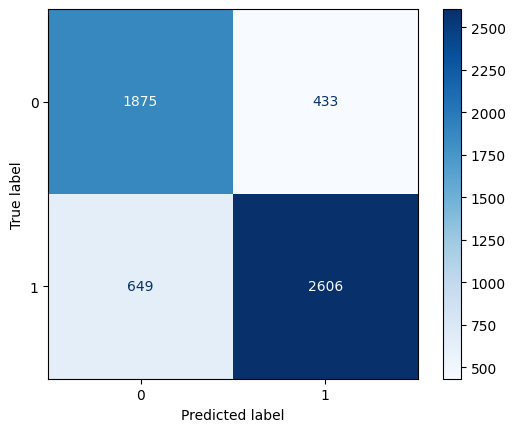

In [43]:

classify_logistic(X_train_pca, Y_train, X_test_pca, Y_test)
#X_train_pca.shape

# **HyperParameter Tuning**

In [44]:
from scipy.stats import uniform

C = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2]
gammaValues = ["scale", "auto"]
param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": C,
    "degree": [i for i in range(1, 20)],
    "gamma": gammaValues,
    "decision_function_shape": ["ovo", "ovr"],
}

In [45]:
param_grid['C']

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
best_clf = best_svc_params_gridsearch(X_train_final, Y_train, param_grid)

Fitting 5 folds for each of 1824 candidates, totalling 9120 fits
[CV 1/5] END C=1e-05, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.738 total time=  20.8s
[CV 2/5] END C=1e-05, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.738 total time=  14.2s


In [ ]:
#C=9.999999999999999e-06, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;

trial_clf = SVC(C=9.999999999999999e-06, decision_function_shape='ovo', degree=1, gamma='scale', kernel='linear')

trial_clf.fit(X_train_final, Y_train)
Y_pred = trial_clf.predict(X_test_final)
accuracy_score(Y_test,Y_pred)

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(Y_test,Y_pred))

In [ ]:
Y.value_counts()